In [2]:
import pandas as pd
import numpy as np

In [3]:
#creating a dataframe using dict
df = pd.DataFrame(data={
'Temperature':[25,np.nan,34,20,15,19,18,np.nan],
'Humidity':[20,20,12,np.nan,13,15,np.nan,np.nan],
'Situation':['Humid',np.nan, 'Too-Sunny','cool','Too Cool','Normal','Normal',np.nan]
})

In [4]:
df

,Temperature,Humidity,Situation
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN


In [6]:
#changing the column name
dfnc = df.rename(columns={"Temperature":"Temp"})

In [7]:
dfnc

,Temp,Humidity,Situation
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN


In [8]:
#converting the column name to upper case
df.columns = df.columns.str.upper()

In [9]:
df

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN


In [10]:
#finding values which are unavailable.
df.isna()

,TEMPERATURE,HUMIDITY,SITUATION
0,False,False,False
1,True,False,True
2,False,False,False
3,False,True,False
4,False,False,False
5,False,False,False
6,False,True,False
7,True,True,True


In [11]:
#finding the count of missing values for each column
df.isna().sum()

TEMPERATURE    2
HUMIDITY       3
SITUATION      2
dtype: int64

In [12]:
import seaborn as sns

<Axes: >

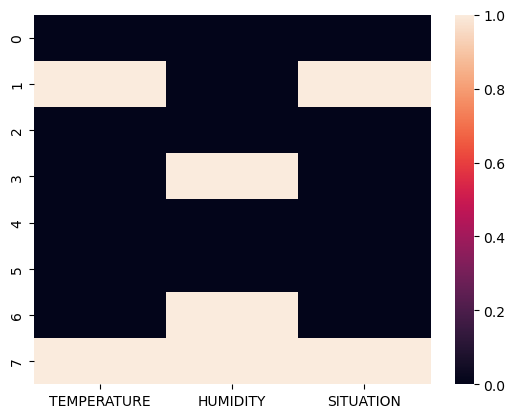

In [13]:
#generating a heatmap to identify the missing values
sns.heatmap(df.isnull())

In [14]:
#drops the whole record even you have one missing value in any column
newdf = df.dropna()

In [15]:
newdf

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
2,34.0,12.0,Too-Sunny
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal


In [16]:
df

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN


In [17]:
#dropping only those records if there is a missing value in all the records.
df.dropna(how="all")

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal


In [18]:
df

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,NaN,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN


In [19]:
# forward filling - Top Down approach
ffill = df.fillna(method="ffill")

In [20]:
ffill

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,25.0,20.0,Humid
2,34.0,12.0,Too-Sunny
3,20.0,12.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,15.0,Normal
7,18.0,15.0,Normal


In [21]:
# backward filling Bottom - Up approach
bfill = df.fillna(method="bfill")

In [22]:
bfill

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,34.0,20.0,Too-Sunny
2,34.0,12.0,Too-Sunny
3,20.0,13.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,NaN,Normal
7,NaN,NaN,NaN


In [23]:
mv = df["HUMIDITY"].mean()

In [24]:
mv

16.0

In [25]:
#finding out the mean value for the column and filling it in missing fields.
df["HUMIDITY"].fillna(mv, inplace=True)

In [26]:
df

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,NaN,20.0,NaN
2,34.0,12.0,Too-Sunny
3,20.0,16.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,16.0,Normal
7,NaN,16.0,NaN


In [27]:
ffill

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
1,25.0,20.0,Humid
2,34.0,12.0,Too-Sunny
3,20.0,12.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,15.0,Normal
7,18.0,15.0,Normal


In [28]:
#finding the duplicate records
print(ffill.duplicated())

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool


In [29]:
#deleting the duplicate records.
ffill.drop_duplicates()

,TEMPERATURE,HUMIDITY,SITUATION
0,25.0,20.0,Humid
2,34.0,12.0,Too-Sunny
3,20.0,12.0,cool
4,15.0,13.0,Too Cool
5,19.0,15.0,Normal
6,18.0,15.0,Normal


<Axes: >

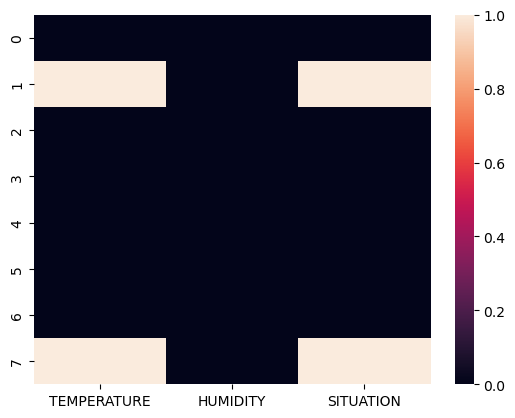

In [30]:
#heatmap for missing values
sns.heatmap(df.isnull())

<Axes: >

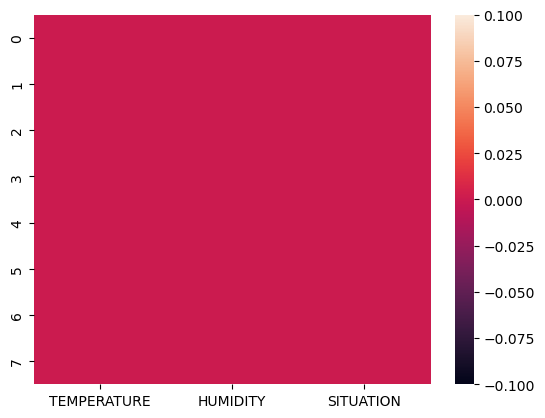

In [31]:
#heatmap for fully available values
sns.heatmap(ffill.isnull())

In [34]:
dsf = pd.read_csv("C:\\Users\Sherin\DA03\dc_dataset.csv")

In [35]:
dsf.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [36]:
dsf.rename(columns={"No_Pation":"No-of-Patients"}, inplace = True)

In [37]:
dsf

,ID,No-of-Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [38]:
dsf.isna()

,ID,No-of-Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1007,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
dsf.isna().sum()

ID                0
No-of-Patients    0
Gender            0
AGE               1
Urea              1
Cr                2
HbA1c             3
Chol              2
TG                2
HDL               1
LDL               2
VLDL              1
BMI               0
CLASS             0
dtype: int64

In [40]:
mvn = dsf["HbA1c"].mean()

In [41]:
mvn

8.284155069582505

In [42]:
dsf["HbA1c"].fillna(mvn, inplace=True)

In [43]:
dsf

,ID,No-of-Patients,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.900000,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.900000,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.800000,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.700000,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.300000,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [44]:
dsf.isna().sum()

ID                0
No-of-Patients    0
Gender            0
AGE               1
Urea              1
Cr                2
HbA1c             0
Chol              2
TG                2
HDL               1
LDL               2
VLDL              1
BMI               0
CLASS             0
dtype: int64

In [46]:
ddsf = dsf.dropna()

In [47]:
ddsf.isna().sum()

ID                0
No-of-Patients    0
Gender            0
AGE               0
Urea              0
Cr                0
HbA1c             0
Chol              0
TG                0
HDL               0
LDL               0
VLDL              0
BMI               0
CLASS             0
dtype: int64